<a href="https://colab.research.google.com/github/FrancoLauri/LaboDatos/blob/main/TrabajoClase/03_02_nosupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bloque 03 - Unidad 02: Aprendizaje No Supervisado - Clustering y Reducción de Dimensionalidad

El aprendizaje no supervisado se enfoca en encontrar patrones ocultos en los datos sin etiquetas o resultados conocidos. En esta clase exploraremos tres técnicas clave de aprendizaje no supervisado: clustering (agrupamiento), asociación y reducción de dimensionalidad. El clustering busca agrupar puntos de datos similares, la asociación descubre relaciones entre variables, y la reducción de dimensionalidad reduce el número de características manteniendo la información relevante.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.objects as so
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Clustering K-means con Scikit-learn
En este ejemplo, vamos a utilizar datos ficticios de puntos en un espacio bidimensional y aplicar el algoritmo K-means para agruparlos.

Te sugerimos leer la [guia del usuario](https://scikit-learn.org/stable/modules/clustering.html#k-means)

In [ ]:


# Datos de ejemplo: puntos en un espacio 2D
scales = [1000, 0.001]  # ¿[mm, km]?

rng = np.random.default_rng(0)
N = 30

df = pd.DataFrame(
    {
        "x": scales[0] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel(),
        "y": scales[1] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel(),
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=2)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
display(df.head())

# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="x", y="y")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)

score = kmeans.score(df[['x','y']])
score

,x,y,cluster,x_cluster,y_cluster
0,6.286511,0.000039,1,-0.097606,0.000486
1,993.394757,0.000042,0,1008.219072,0.000501
2,32.021133,0.001004,1,-0.097606,0.000486
3,1005.245006,0.000929,0,1008.219072,0.000501
4,-26.783469,-0.000007,1,-0.097606,0.000486


-271490.80276423

,x,y,cluster,x_cluster,y_cluster
0,6.286511,0.000039,1,-0.097606,0.000486
1,993.394757,0.000042,0,1008.219072,0.000501
2,32.021133,0.001004,1,-0.097606,0.000486
3,1005.245006,0.000929,0,1008.219072,0.000501
4,-26.783469,-0.000007,1,-0.097606,0.000486


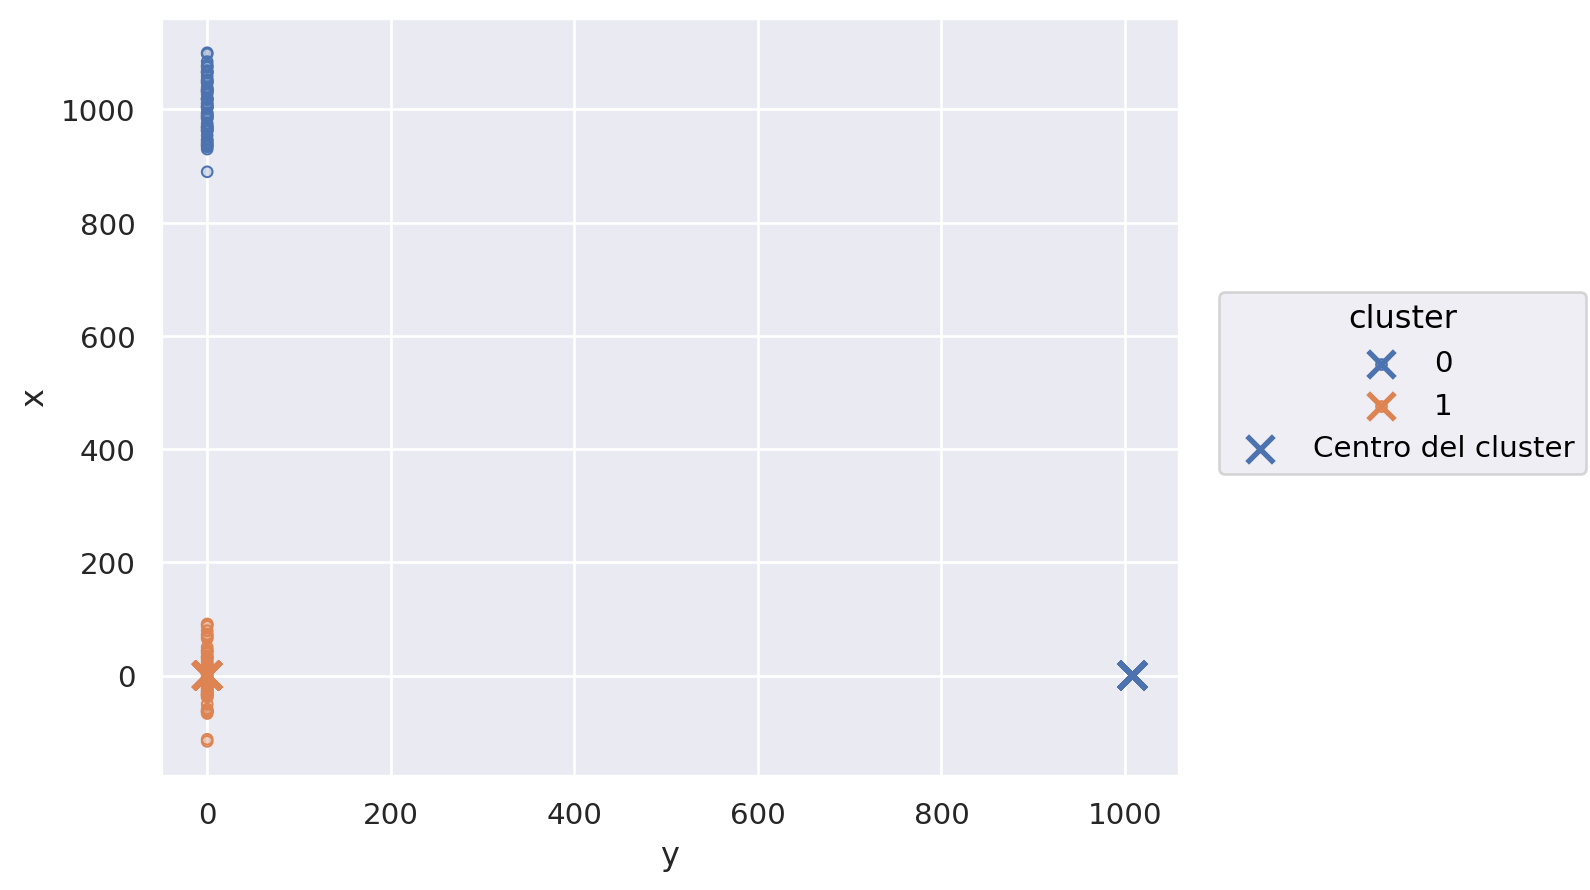

In [ ]:
#2)
# Datos de ejemplo: puntos en un espacio 2D
scales = [1000, 0.001]  # ¿[mm, km]?

rng = np.random.default_rng(0)
N = 30

df = pd.DataFrame(
    {
        "x": scales[0] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel(),
        "y": scales[1] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel(),
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=2)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
display(df.head())

# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="y", y="x")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)

al cambiar las unidades el plot pierde sentido. no se realizan correctamente los clusters, y aun si lo hiciesen la informacion es mucho menos relevante

,x,y,cluster,x_cluster,y_cluster
0,6.286511,0.000039,1,35.450429,0.000519
1,993.394757,0.000042,0,966.575931,0.000490
2,32.021133,0.001004,1,35.450429,0.000519
3,1005.245006,0.000929,0,966.575931,0.000490
4,-26.783469,-0.000007,2,-40.723932,0.000449


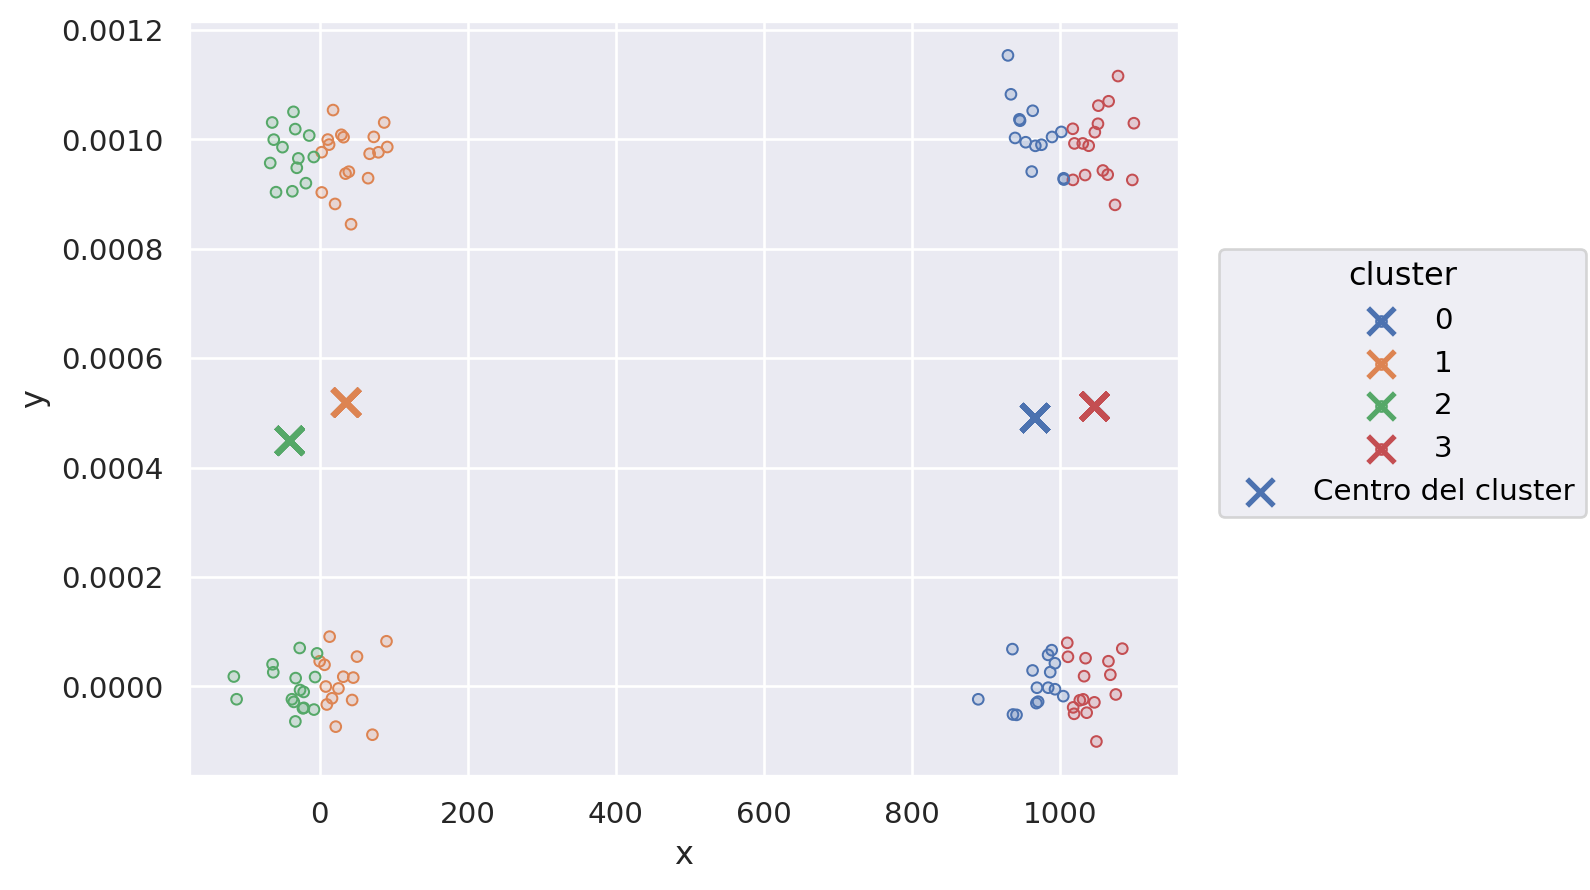

In [ ]:
#3) ¿Qué va a pasar si aumentas el número de clusters a 4? Probalo. ¿Y con scales = [1, 1]?

# Datos de ejemplo: puntos en un espacio 2D
scales = [1000, 0.001]  # ¿[mm, km]?

rng = np.random.default_rng(0)
N = 30

df = pd.DataFrame(
    {
        "x": scales[0] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel(),
        "y": scales[1] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel(),
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
display(df.head())

# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="x", y="y")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)

-0.5758558387013857


,x,y,cluster,x_cluster,y_cluster
0,0.006287,0.039379,2,-0.006705,0.002246
1,0.993395,0.042204,0,1.004105,0.002758
2,0.032021,1.003780,1,0.006509,0.969791
3,1.005245,0.928661,3,1.012333,0.999991
4,-0.026783,-0.006752,2,-0.006705,0.002246


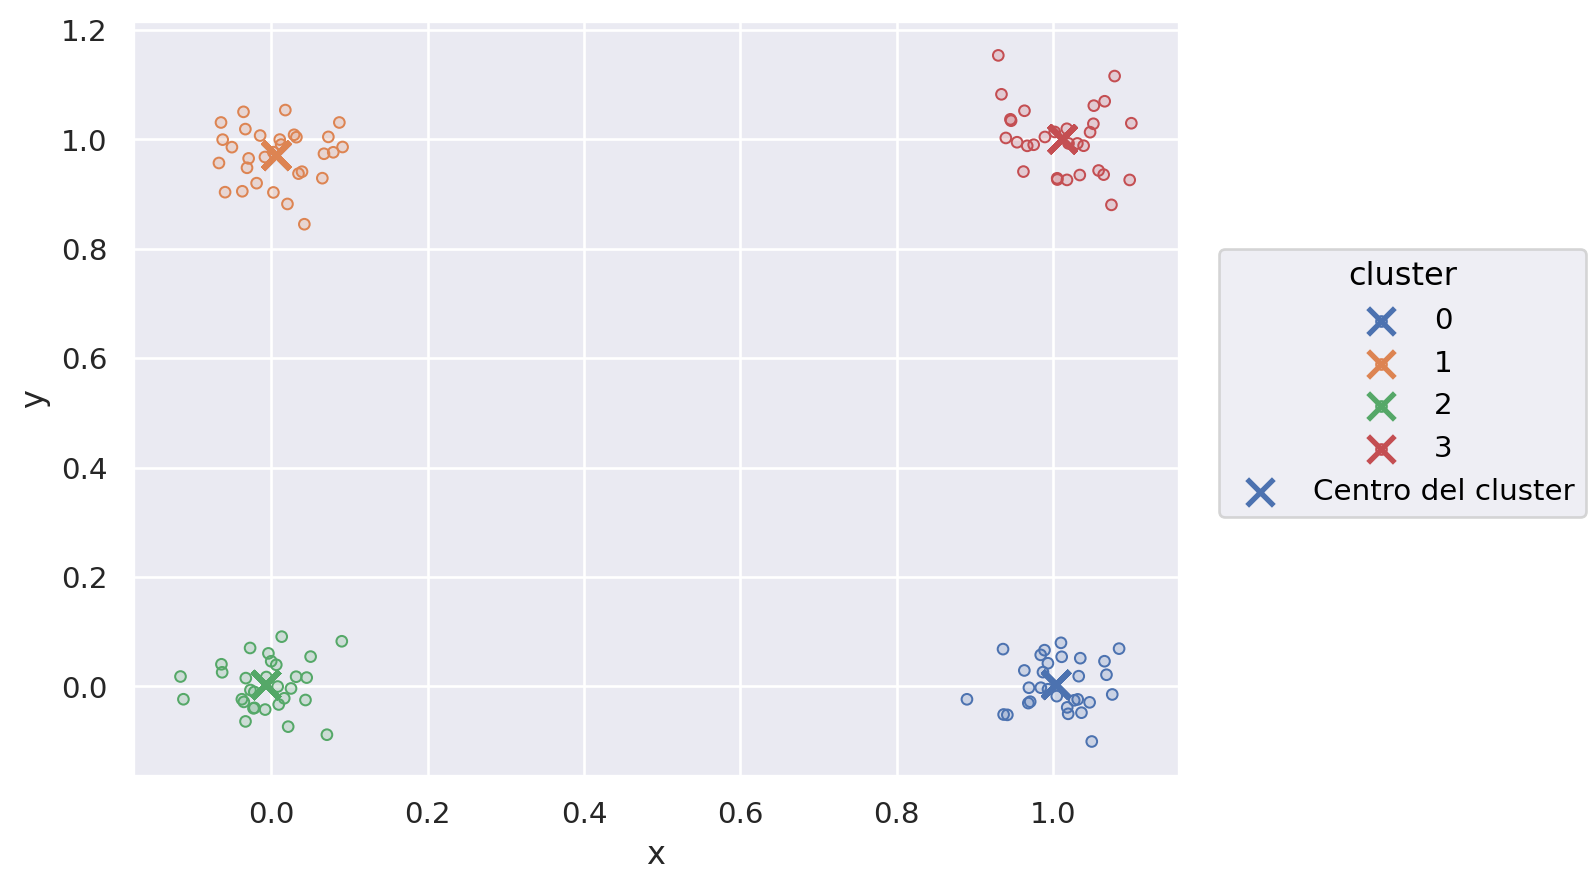

In [ ]:
# Datos de ejemplo: puntos en un espacio 2D
scales = [1, 1]  # ¿[mm, km]?

rng = np.random.default_rng(0)
N = 30

df = pd.DataFrame(
    {
        "x": scales[0] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel(),
        "y": scales[1] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel(),
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
score = kmeans.score(df[['x','y']])
print(score)
display(df.head())
# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="x", y="y")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)

,x,y,cluster,x_cluster,y_cluster
0,0.602849,0.547089,3,0.751667,0.304984
1,0.655121,0.003013,3,0.751667,0.304984
2,0.913691,0.389020,3,0.751667,0.304984
3,0.065270,1.005940,0,0.246425,0.902242
4,0.834988,0.664665,2,0.748308,0.900883


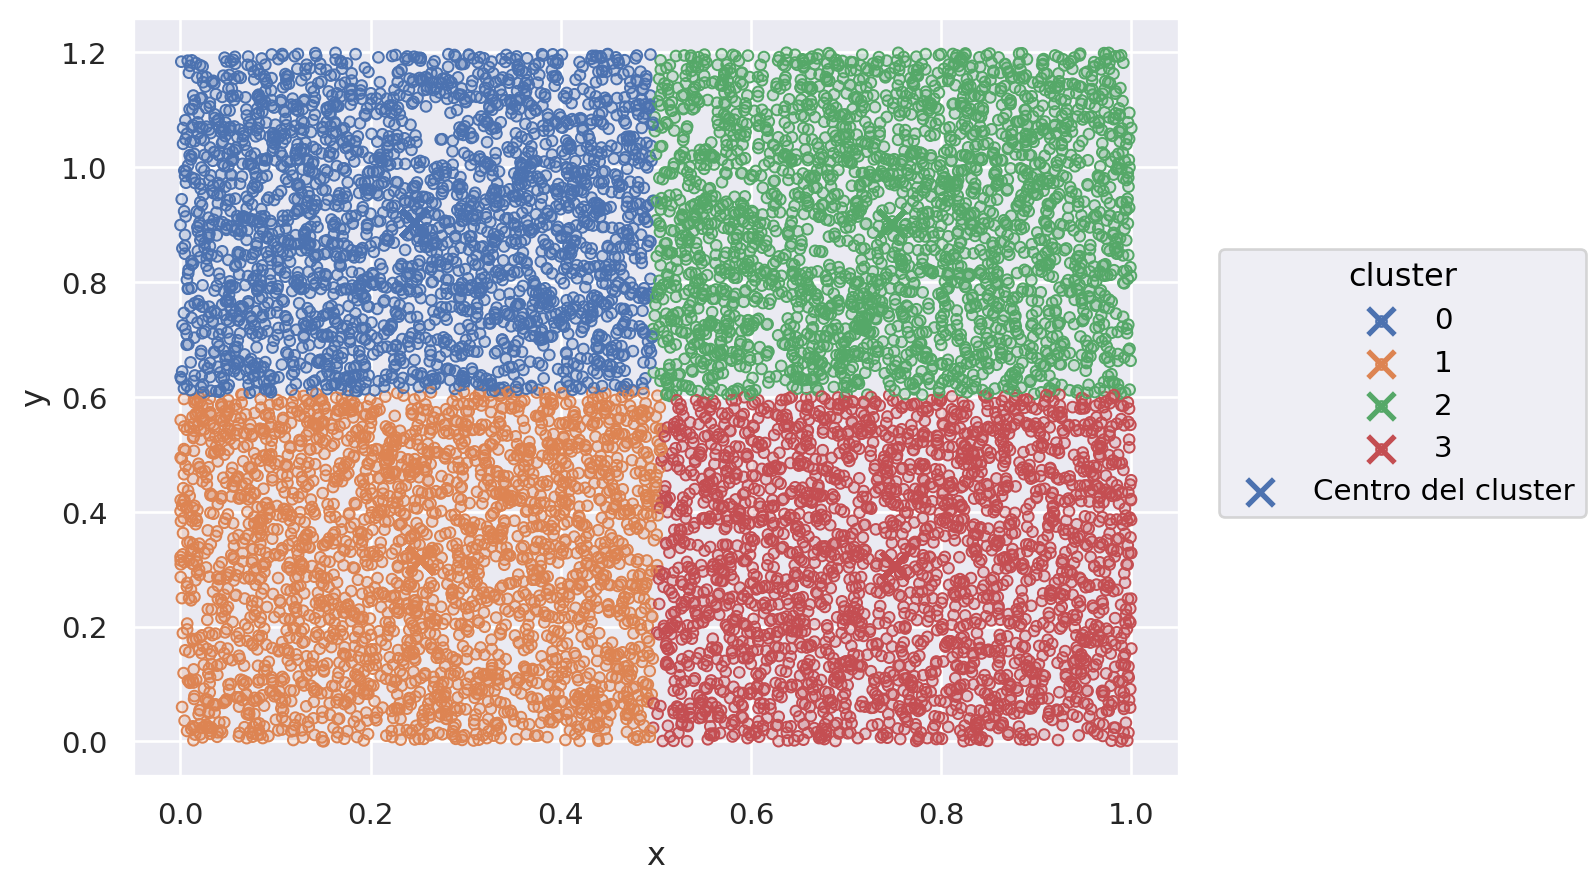

In [ ]:
#4)Hacé una predición distintos puntos en el plano y busca entender como se divide el plano según a que cluster se asigna.
num = 10000

df = pd.DataFrame(
    {
        "x": rng.uniform(0, 1, size=num),
        "y": rng.uniform(0, 1.2, size=num)
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
display(df.head())

# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="x", y="y")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)
score = kmeans.score(df[['x','y']])
score

**Para hacer**:

1. Leer la documentación de `KMeans` en Scikit-learn.
2. ¿Qué pasa si intercambias las "unidades" de `x` e `y`?
3. ¿Qué va a pasar si aumentas el número de clusters a 4? Probalo. ¿Y con `scales = [1, 1]`?
4. Hacé una predición distintos puntos en el plano y busca entender como se divide el plano según a que cluster se asigna.
5. ¿Qué podrías usar como *score* para estos datos?

**Para pensar en grupo**
1. ¿Son estables los clusters ante variaciones de los parámetros del método? ¿Cómo lo probarías?
2. ¿Son estables los clusters ante el ruido? ¿Cómo lo probarías?


,x,y,cluster,x_cluster,y_cluster
0,6.286511,0.000039,1,-12.440030,0.000411
1,993.394757,0.000042,3,1012.267692,0.000381
2,32.021133,0.001004,4,51.942093,0.000575
3,1005.245006,0.000929,3,1012.267692,0.000381
4,-26.783469,-0.000007,1,-12.440030,0.000411


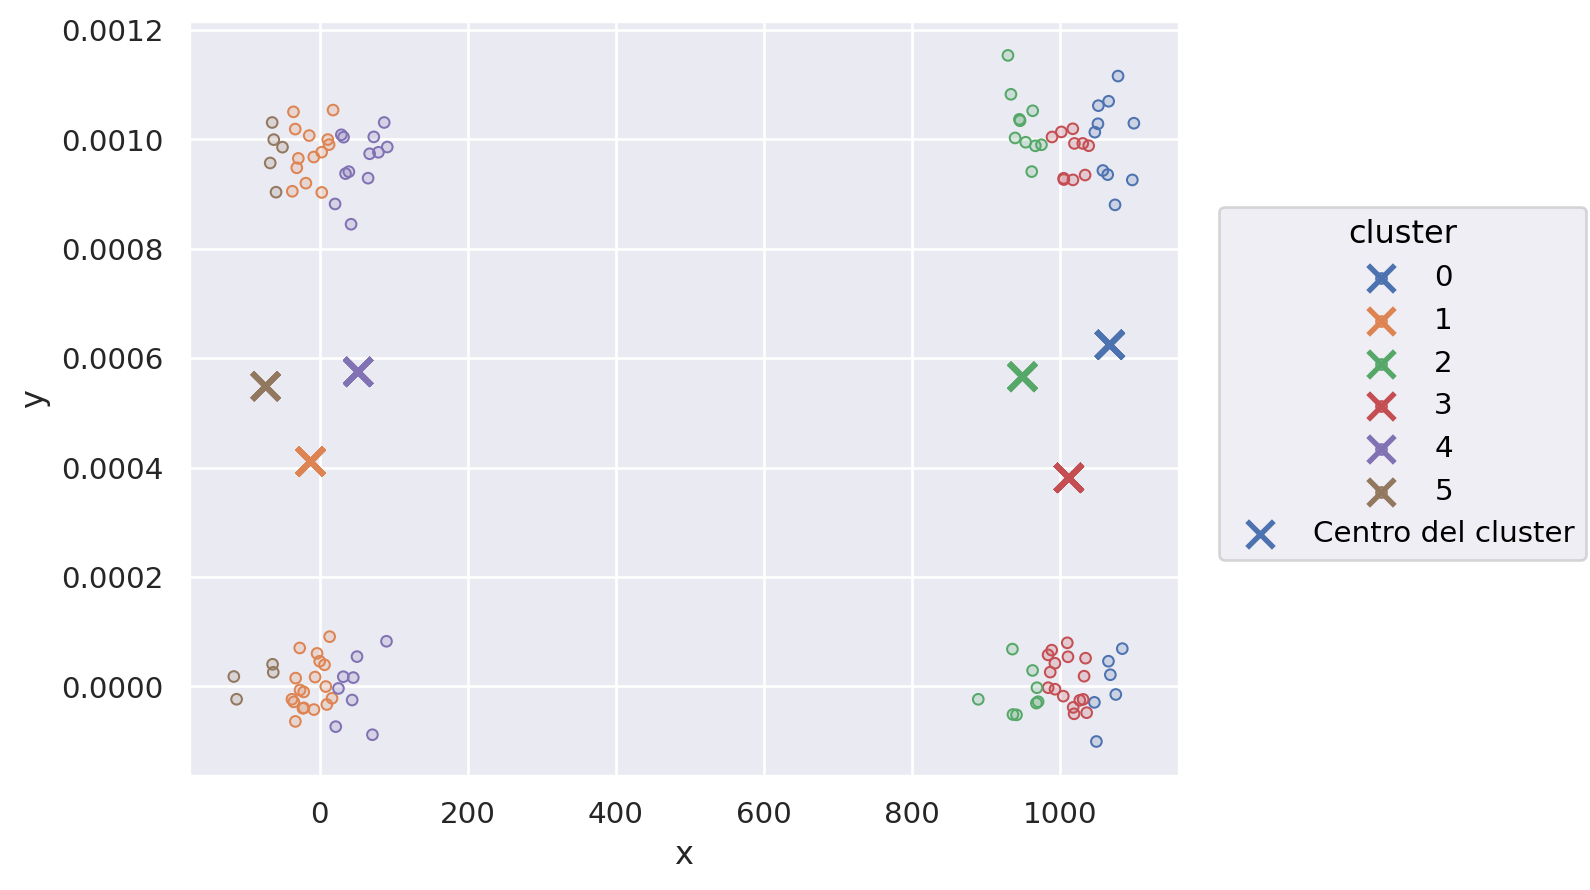

In [ ]:
#1)
scales = [1000, 0.001]  # ¿[mm, km]?

rng = np.random.default_rng(0)
N = 30

df = pd.DataFrame(
    {
        "x": scales[0] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel(),
        "y": scales[1] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel(),
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=6)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
display(df.head())

# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="x", y="y")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)


,x,y,cluster,x_cluster,y_cluster
0,0.045666,0.071132,1,-0.004458,-0.004362
1,1.035599,-0.023889,3,1.006863,-0.007654
2,0.035801,1.074750,2,-0.023699,1.003613
3,0.933906,0.980797,0,1.012324,1.014247
4,-0.033536,0.061250,1,-0.004458,-0.004362


-1.1157134728387965


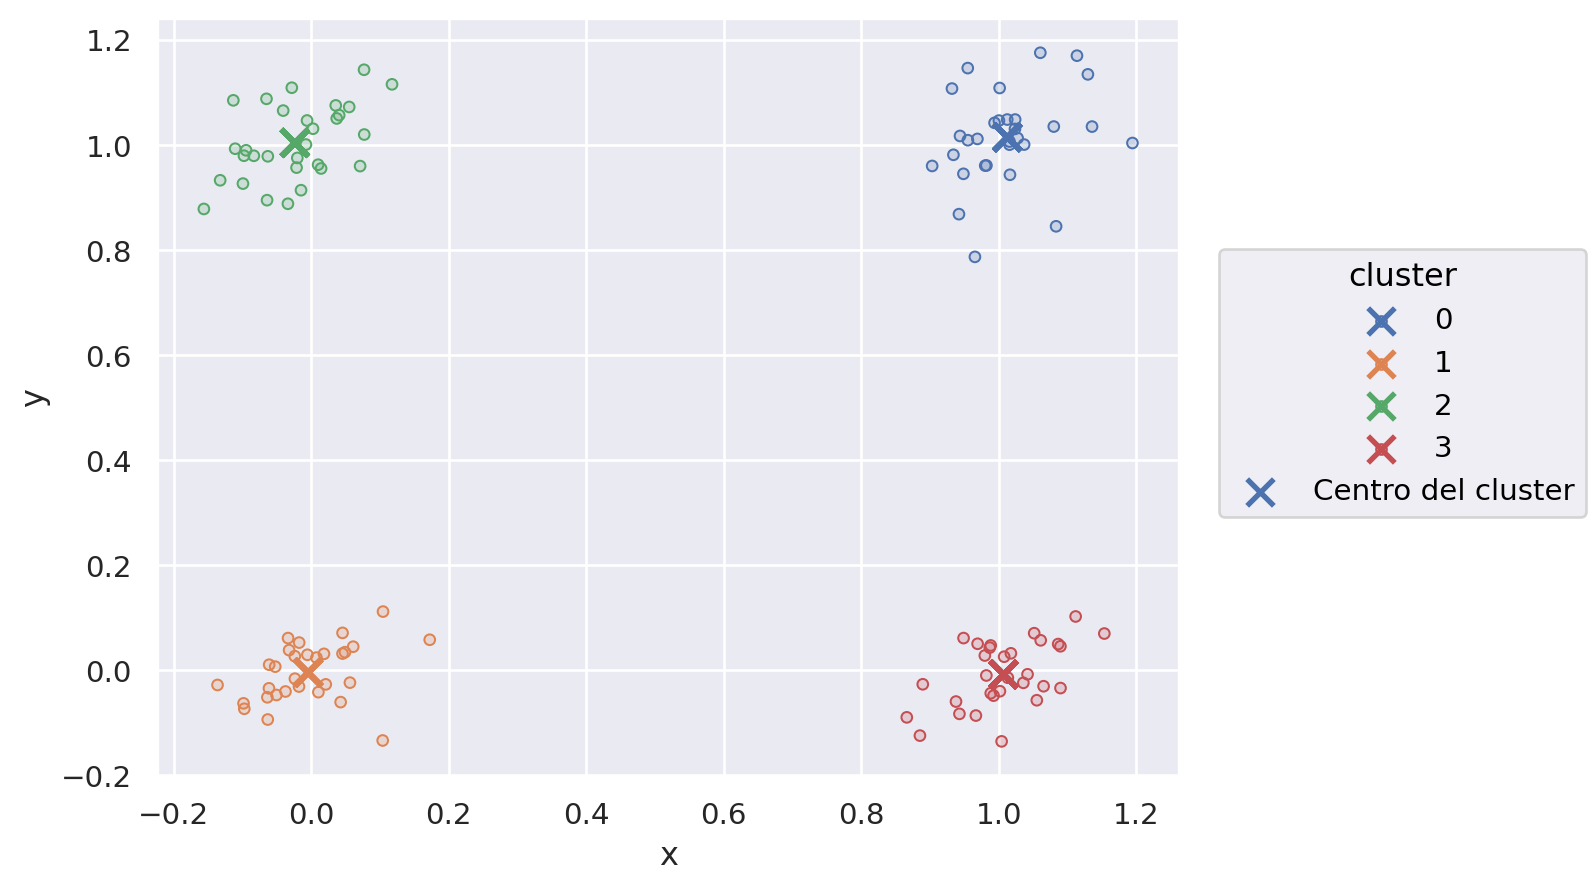

In [ ]:
#2)
scale = [1,1]
rng = np.random.default_rng(0)
error = rng.normal(0, 0.05, size=N*4)

df = pd.DataFrame(
    {
        "x": scales[0] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel() + error,
        "y": scales[1] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel() + error,
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
display(df.head())
score = kmeans.score(df[['x','y']])
print(score)


# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="x", y="y")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)


## Reducción de Dimensionalidad PCA (Análisis de Componentes Principales) con Scikit-learn
En este ejemplo, vamos a utilizar datos ficticios de múltiples características para reducirlos a 2 dimensiones utilizando PCA.

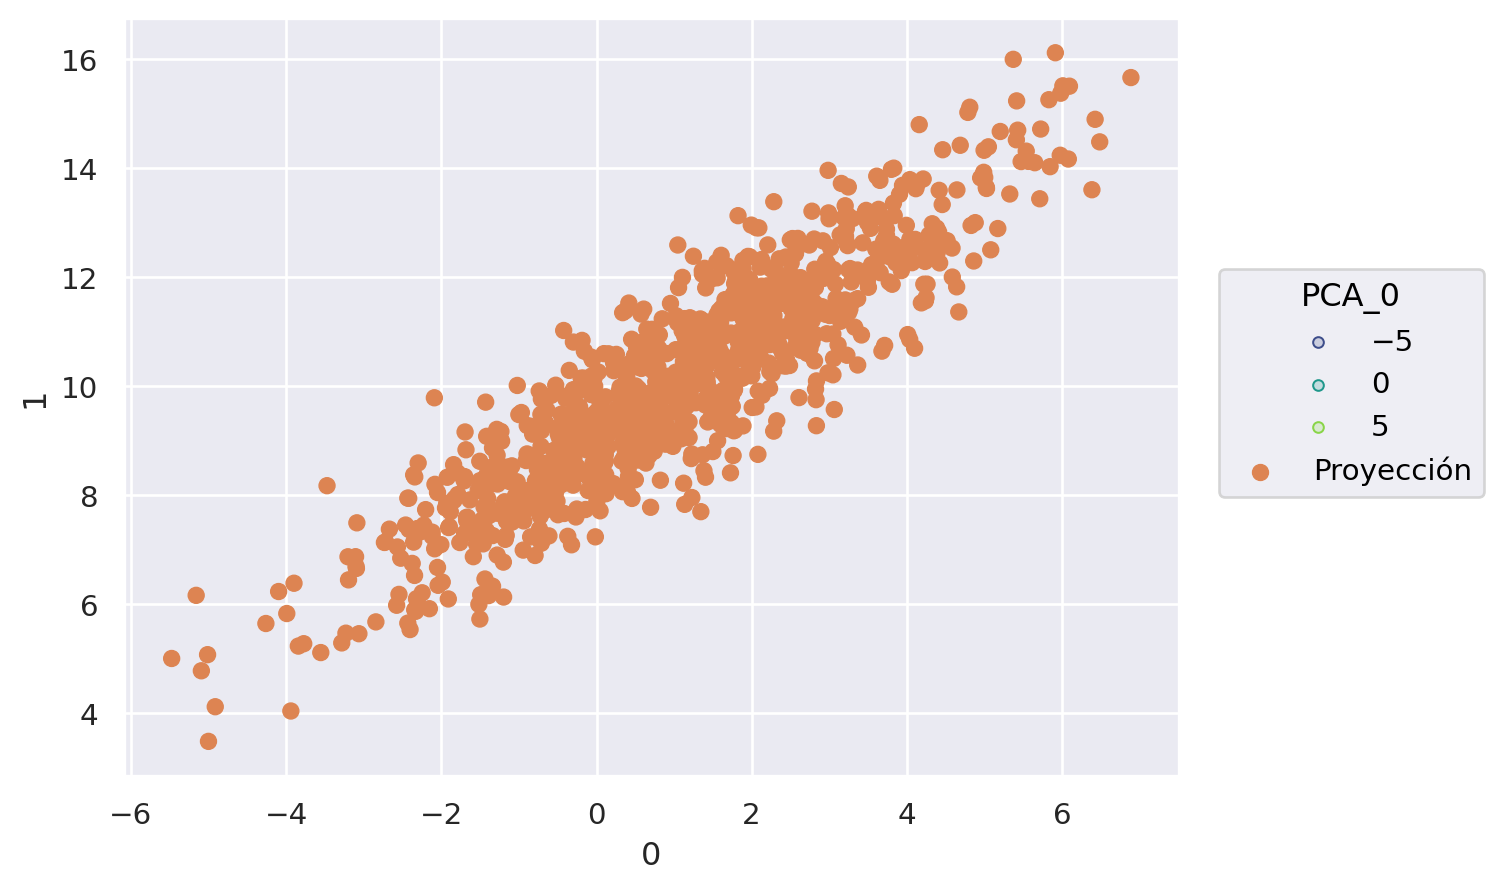

In [ ]:


# Datos de ejemplo: puntos en un espacio de 2 dimensiones
rng = np.random.default_rng()

promedios = [1, 10]

desv_est = [2, 2]
correlacion = 0.9
covarianza = correlacion * desv_est[0] * desv_est[1]

matriz_de_convarianza = [
    [desv_est[0] ** 2, covarianza],
    [covarianza, desv_est[1] ** 2],
]

X = pd.DataFrame(rng.multivariate_normal(promedios, matriz_de_convarianza, size=1_000))

# Inicializar el modelo PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Ajustar y transformar los datos
X_reducido = pca.fit_transform(X)
X = X.join(pd.DataFrame(X_reducido).add_prefix("PCA_"))

# Proyectar las componentes al subespacio de PCA
proyeccion = pca.inverse_transform(X.filter(like="PCA_"))
X = X.join(proyeccion.add_prefix("proyeccion_"))


# Graficar los puntos transformados en 2D
(
    so.Plot(X)
    .scale(color="viridis")
    .add(so.Dots(), x=0, y=1, color="PCA_0")
    .add(so.Dot(color="C1"), x="proyeccion_0", y="proyeccion_1", label="Proyección")
)

In [ ]:
#2)Calcula la varianza explicada por cada componente. ¿Que significa?
var_originales = X[[0, 1]].var()
print(var_originales)
# Porcentaje de varianza explicada por cada componente
pd.Series(pca.explained_variance_ratio_, index=["PCA_0", "PCA_1"])


"""
Las varianzas originales (X[0], X[1]) indican cuán dispersos están los datos en las direcciones originales.

Las varianzas de PCA (PCA_0, PCA_1) indican cuánta varianza (información) captura cada componente principal.

PCA reordena las direcciones del espacio para que:

    PCA_0 contenga la mayor varianza posible.

    PCA_1 contenga la mayor varianza posible ortogonal a PCA_0.

"""



0    4.061796
1    3.987520
dtype: float64


'\nLas varianzas originales (X[0], X[1]) indican cuán dispersos están los datos en las direcciones originales.\n\nLas varianzas de PCA (PCA_0, PCA_1) indican cuánta varianza (información) captura cada componente principal.\n\nPCA reordena las direcciones del espacio para que:\n\n    PCA_0 contenga la mayor varianza posible.\n\n    PCA_1 contenga la mayor varianza posible ortogonal a PCA_0.\n\n'

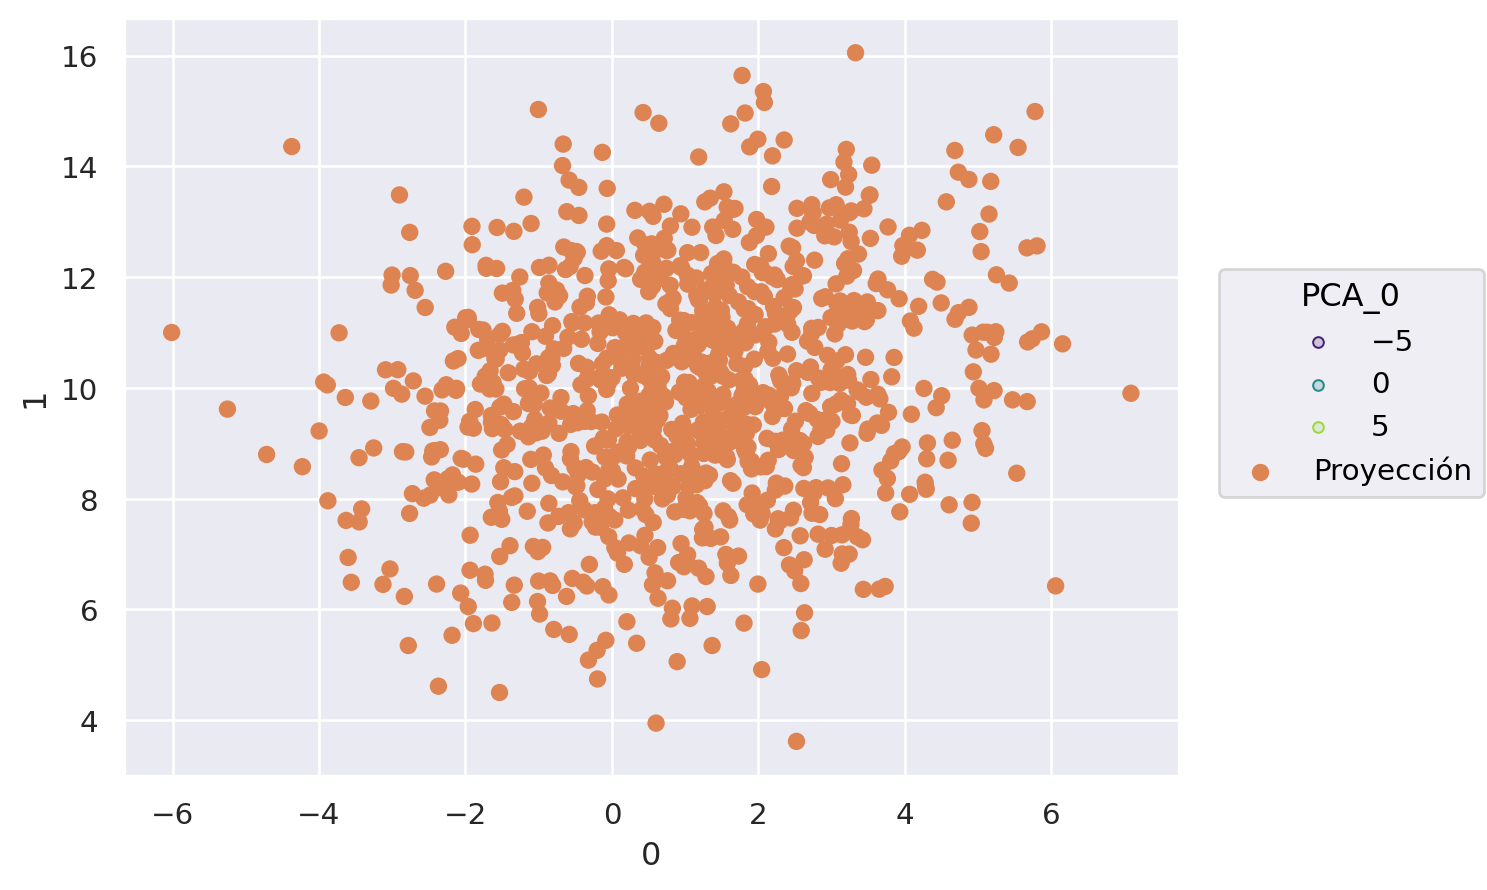

In [ ]:
#3)

# Datos de ejemplo: puntos en un espacio de 2 dimensiones
rng = np.random.default_rng()

promedios = [1, 10]

desv_est = [2, 2]
correlacion = 0.2
covarianza = correlacion * desv_est[0] * desv_est[1]

matriz_de_convarianza = [
    [desv_est[0] ** 2, covarianza],
    [covarianza, desv_est[1] ** 2],
]

X = pd.DataFrame(rng.multivariate_normal(promedios, matriz_de_convarianza, size=1_000))

# Inicializar el modelo PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Ajustar y transformar los datos
X_reducido = pca.fit_transform(X)
X = X.join(pd.DataFrame(X_reducido).add_prefix("PCA_"))

# Proyectar las componentes al subespacio de PCA
proyeccion = pca.inverse_transform(X.filter(like="PCA_"))
X = X.join(proyeccion.add_prefix("proyeccion_"))


# Graficar los puntos transformados en 2D
(
    so.Plot(X)
    .scale(color="viridis")
    .add(so.Dots(), x=0, y=1, color="PCA_0")
    .add(so.Dot(color="C1"), x="proyeccion_0", y="proyeccion_1", label="Proyección")
)

cuanto mas cercana la corr de 1 mas semejante a una linea es la proyecccion. caso proyectado con 0.2, parece una nube


In [ ]:
# Datos de ejemplo: puntos en un espacio de 2 dimensiones
rng = np.random.default_rng()

promedios = [1, 10]

desv_est = [2, 2]
correlacion = 0.9
covarianza = correlacion * desv_est[0] * desv_est[1]

matriz_de_convarianza = [
    [desv_est[0] ** 2, covarianza],
    [covarianza, desv_est[1] ** 2]
]

X = pd.DataFrame(rng.multivariate_normal(promedios, matriz_de_convarianza, size=1_000))

promedios2 = [2,9]
correlacion2 = 0.7
covarianza2 = correlacion2 * desv_est[0] * desv_est[1]
matriz_de_convarianza2 = [
    [desv_est[0] ** 2, covarianza],
    [covarianza, desv_est[1] ** 2]
]

X2 = pd.DataFrame(rng.multivariate_normal(promedios, matriz_de_convarianza, size=1_000))

Xjoin = pd.concat([X,X2])

# Inicializar el modelo PCA para reducir a 2 dimensiones
pca = PCA(n_components=4)

# Ajustar y transformar los datos
X_reducido = pca.fit_transform(Xjoin)
X = X.join(pd.DataFrame(X_reducido).add_prefix("PCA_"))

# Proyectar las componentes al subespacio de PCA
proyeccion = pca.inverse_transform(Xjoin.fil2ter(like="PCA_"))
X = X.join(proyeccion.add_prefix("proyeccion_"))


# Graficar los puntos transformados en 2D
(
    so.Plot(X)
    .scale(color="viridis")
    .add(so.Dots(), x=0, y=1, color="PCA_0")
    .add(so.Dot(color="C1"), x="proyeccion_0", y="proyeccion_1", label="Proyección")
)

AttributeError: 'DataFrame' object has no attribute 'fil2ter'

**Para hacer**:

1. Leer la documentación de PCA en Scikit-learn.
2. Calcula la varianza explicada por cada componente. ¿Que significa?
3. Variar la correlacción (`corr = ...`) de los datos generados. ¿Qué sucede con la proyección?
4. Variar el número de componentes `PCA(n_components=...)`. ¿Qué sucede con la proyección?

**Para pensar en grupo**:

1. ¿Que significado tienen las componentes principales?
2. ¿Son estables ante el ruido? ¿Y ante *outliers*? ¿Cómo lo probarías?
3. ¿Por qué es importante estandarizar los datos antes de aplicar PCA?

## Clustering de Clientes de un Mayorista

Este conjunto de datos contiene información sobre los gastos anuales de clientes de un mayorista en diferentes categorías de productos, como frescos, leche, comestibles y detergentes.

https://archive.ics.uci.edu/ml/datasets/wholesale+customers


**Para hacer:**
1. Cargá el conjunto de datos de **Clientes de un mayorista** desde el UCI Machine Learning Repository.
2. Describí las columnas y los tipos de datos utilizando el método .info(). Revisá si hay valores faltantes y corregí los tipos de datos si es necesario.
3. Curaduría de los datos: Eliminá o imputá los valores faltantes y asegurate de que las características estén en el formato adecuado.
4. Explorá las características. ¿Qué variables creés que pueden ayudar a agrupar clientes? ¿Cuáles pueden ser redundantes?
5. Visualizá los datos utilizando gráficos de dispersión y correlaciones entre las variables. Identificá posibles grupos dentro de los datos.
6. Aplicá el algoritmo K-means con un número de clusters que creas apropiado.
7. Visualizá los grupos generados y evaluá la calidad del clustering.

**Para discutir en grupo**:

1. Interpretá que es cada cluster.
2. ¿Es el óptimo el número de clusters?

In [ ]:
pip install ucimlrepo

In [ ]:
#1) carga el grupo de datos desde uci machinelearning repo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# metadata
print(wholesale_customers.metadata)

# variable information
print(wholesale_customers.variables)


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [ ]:
#2) describi las columas y los tipos de datos

df = pd.concat([X, y],axis=1)
df.info()
print(len(df))
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   Region            440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
440
Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Region              0
dtype: int64


In [ ]:
#3)

df.head()

#quiero ver los distintos valores de channel y de Region

print(df['Channel'].value_counts())
print(df['Region'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64
Region
3    316
1     77
2     47
Name: count, dtype: int64


In [ ]:
# Reemplazar valores por sus etiquetas
df['Channel'] = df['Channel'].replace({1: 'Horeca', 2: 'Retail'})
df['Region'] = df['Region'].replace({1: 'Lisbon', 2: 'Oporto', 3: 'Other Region'})

# Convertir a categoría
df['Channel'] = df['Channel'].astype('category')
df['Region'] = df['Region'].astype('category')

df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,Retail,12669,9656,7561,214,2674,1338,Other Region
1,Retail,7057,9810,9568,1762,3293,1776,Other Region
2,Retail,6353,8808,7684,2405,3516,7844,Other Region
3,Horeca,13265,1196,4221,6404,507,1788,Other Region
4,Retail,22615,5410,7198,3915,1777,5185,Other Region


In [ ]:
print(df['Channel'].unique())
print(df['Region'].unique())


['Retail', 'Horeca']
Categories (2, object): ['Horeca', 'Retail']
['Other Region', 'Lisbon', 'Oporto']
Categories (3, object): ['Lisbon', 'Oporto', 'Other Region']


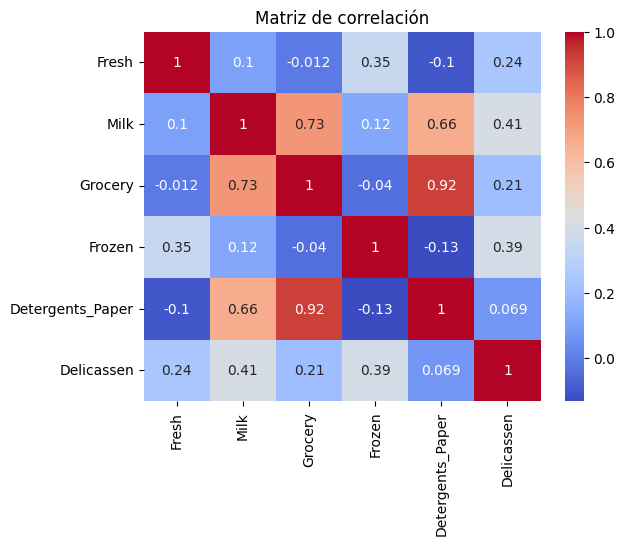

In [ ]:
#4)Explorá las características. ¿Qué variables creés que pueden ayudar a agrupar clientes? ¿Cuáles pueden ser redundantes?

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

las variables milk, grocery y detergents_paper estar mas corelacionadas, son buenos parametros para agrupar clientes


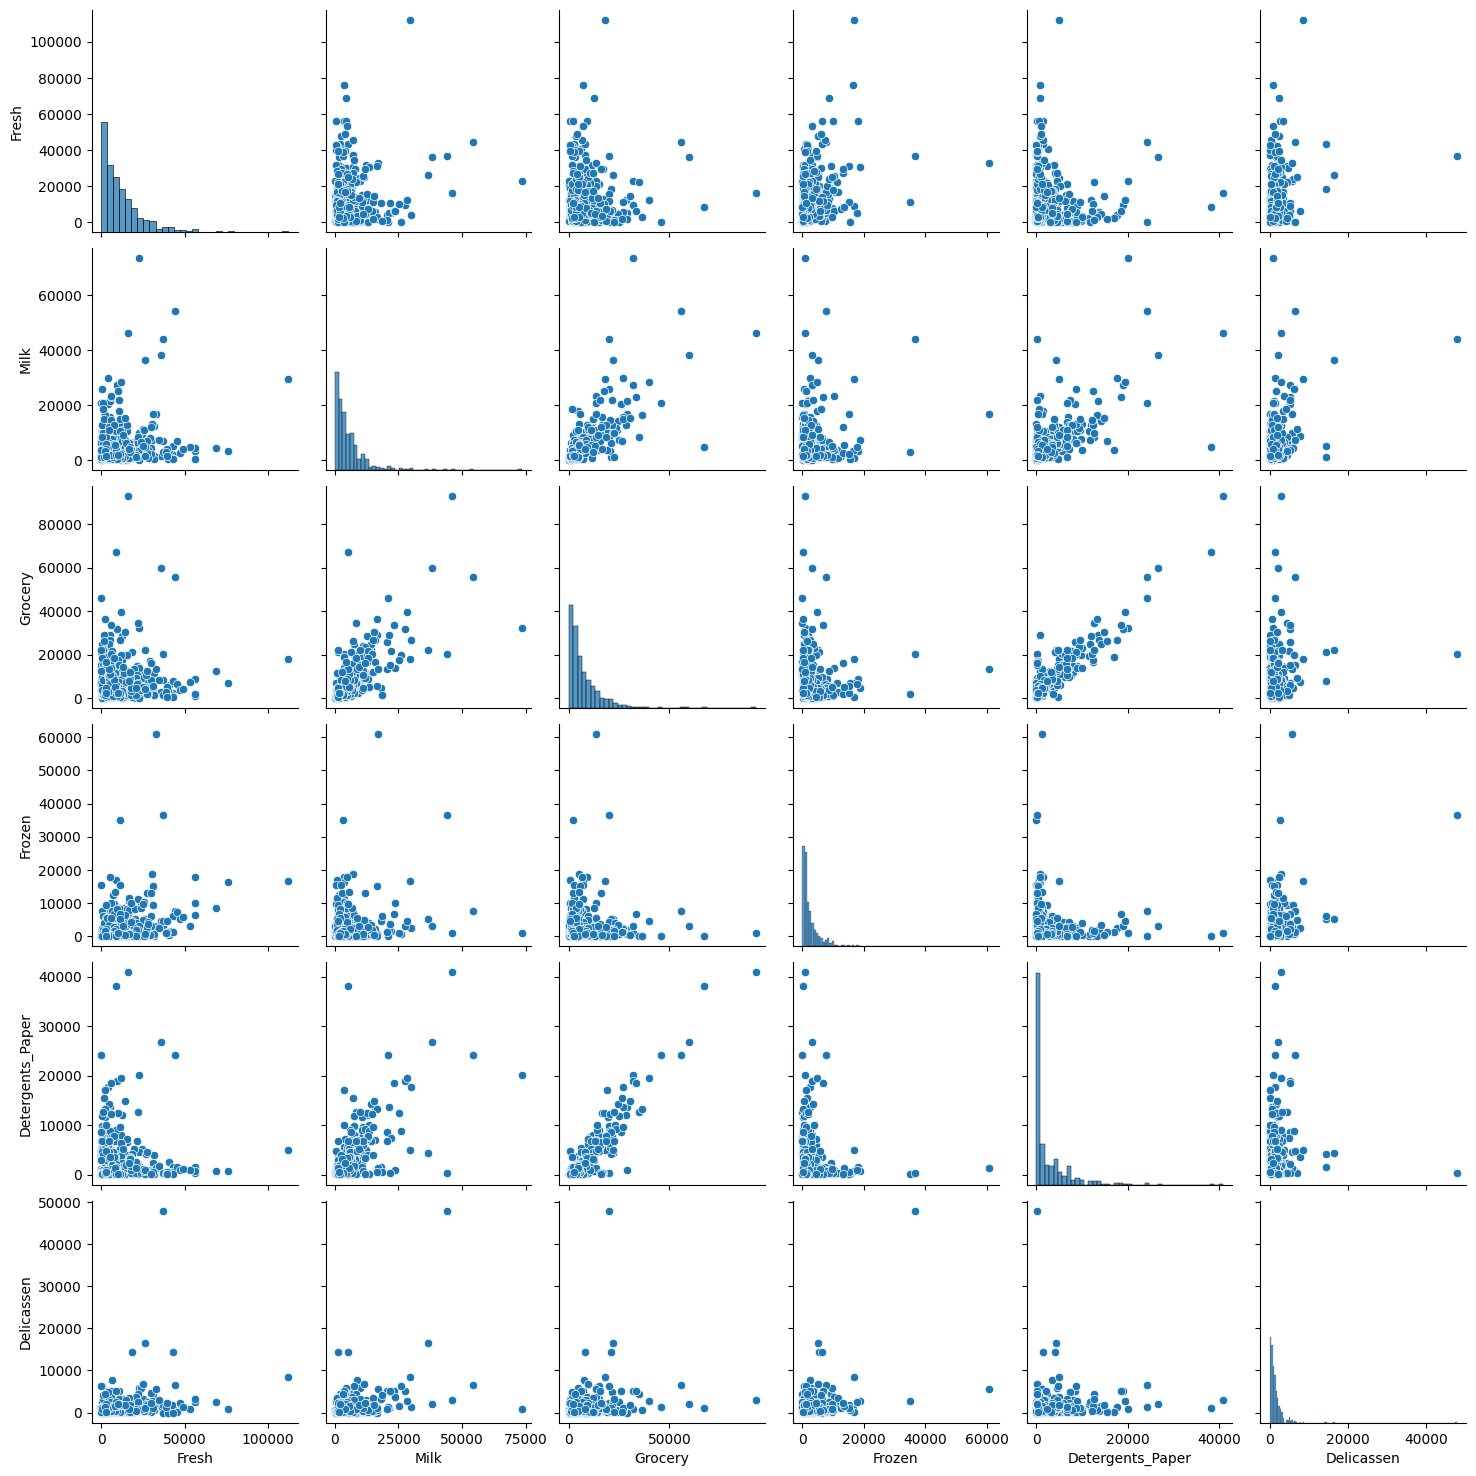

In [ ]:
#5)Visualizá los datos utilizando gráficos de dispersión y correlaciones entre las variables. Identificá posibles grupos dentro de los datos.

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

sns.pairplot(df[features])
plt.show()

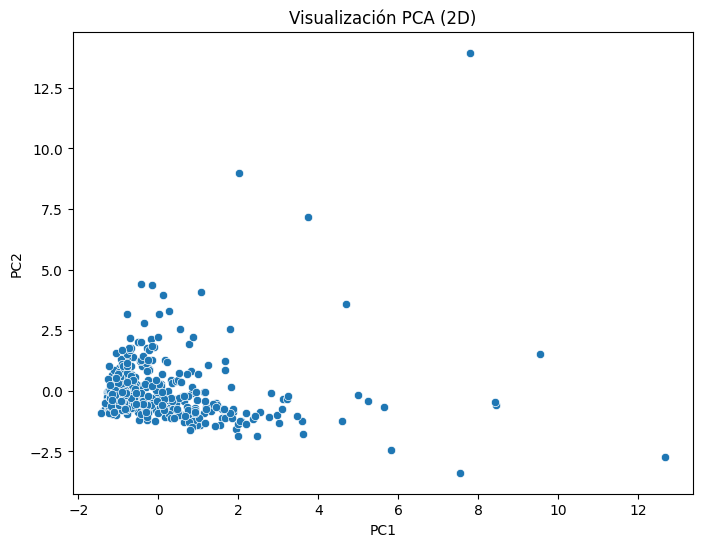

In [ ]:
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.title('Visualización PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

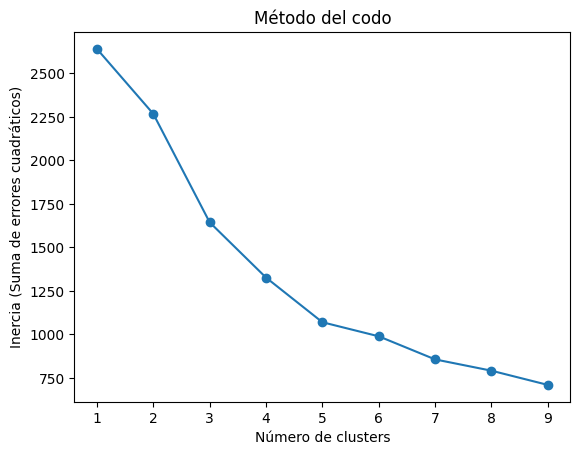

In [ ]:
#6 y 7)

inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia (Suma de errores cuadráticos)')
plt.title('Método del codo')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# Agregar al DataFrame original
X_clustered = X.copy()
X_clustered['Cluster'] = clusters

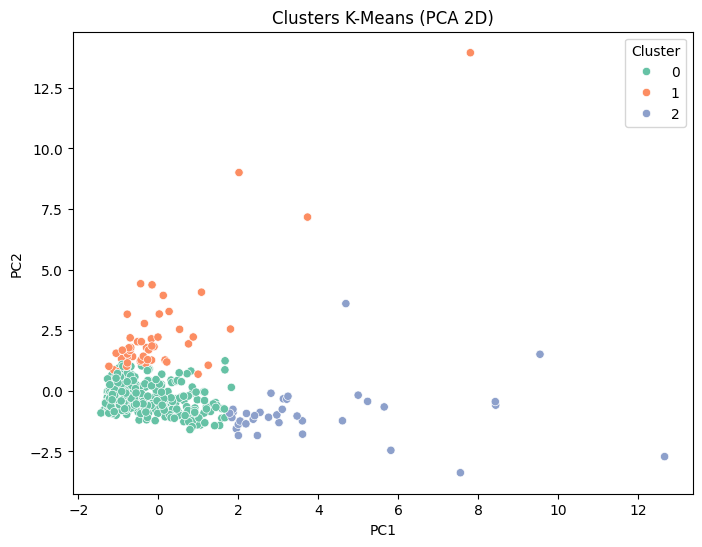

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2')
plt.title('Clusters K-Means (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.458


## Reducción de Dimensionalidad de datos de dígitos manuscritos.

El conjunto de datos MNIST (imágenes de dígitos manuscritos) contiene imágenes en escala de grises de dígitos manuscritos (0-9) de 28x28 píxeles, con un total de 70,000 imágenes.

https://www.kaggle.com/c/digit-recognizer



**Para hacer:**
1. Descargá el conjunto de datos de **MNIST (imágenes de dígitos manuscritos)** desde Kaggle:
2. Describí las columnas y los tipos de datos utilizando .info(). Revisá si hay datos faltantes y verificá que los tipos de datos sean correctos.
3. Curaduría de los datos: Si es necesario, eliminá o imputá valores faltantes y corregí los tipos de datos.
4. Explorá las características. Observá si algunas variables tienen poca variación o pueden ser eliminadas sin perder información relevante.
5. Visualizá los datos reduciendo las dimensiones a 2 usando PCA y graficando los datos en dos dimensiones.

**Para discutir en grupo**:

1. ¿Cuánto varía la calidad de los datos con menos dimensiones?
2. Proba reducir aún más las dimensiones y observá cómo cambia la interpretación de los datos.

In [ ]:


df2 = pd.read_csv("/content/sample_data/sample_submission.csv")

df2.info()
df2.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


,0
ImageId,0
Label,0


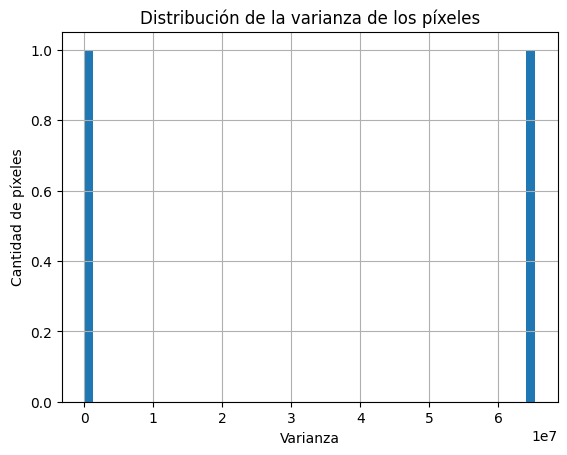

In [ ]:
# Calcular la varianza de cada columna (píxel)
pixel_variance = df2.var()

# Visualizar la distribución de varianzas
pixel_variance.hist(bins=50)
plt.title("Distribución de la varianza de los píxeles")
plt.xlabel("Varianza")
plt.ylabel("Cantidad de píxeles")
plt.show()

Píxeles con varianza 0: 0


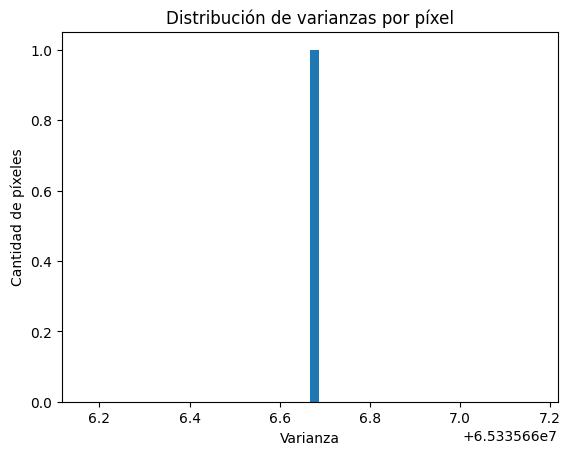

In [ ]:
# Suponiendo que 'label' es la columna de clase
pixel_columns = df2.columns.drop('Label')

# Calculamos la varianza de cada píxel
variances = df2[pixel_columns].var()

# Cuántas columnas tienen varianza 0
print(f'Píxeles con varianza 0: {(variances == 0).sum()}')

# Visualizar distribución de varianzas
import matplotlib.pyplot as plt

plt.hist(variances, bins=50)
plt.title("Distribución de varianzas por píxel")
plt.xlabel("Varianza")
plt.ylabel("Cantidad de píxeles")
plt.show()